In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.misc
from scipy import ndimage
import matplotlib.pyplot as plt

import pandas as pd

from tqdm import tqdm
from notebook_video_writer import VideoWriter

## Análisis de la Superficie Ablacionada

### Cargamos Parámetros Para el Análisis

In [11]:
# df = pd.DataFrame(columns=['Fluence (J/cm$^2$)', 'Depth (um)', 'Diameter (um)','Diameter$^2$ (um$^2$)'])
# df = pd.DataFrame(columns=['F', 'L', 'Lnm','D','D2'])

# ------------------ Temperatura Crítica ------------------------------------
Tc = 5370 # Temperatura Crítica (K)
# ------------------------------------------------------------------------

# -------------------- Dataframe ya cargado -------------------------------
df = pd.read_excel("Dataframe.xlsx",header=0)
# ------------------------------------------------------------------------

# ----------------------------------- MALLADO USADO ------------------
### PASOS EN Z
dz = 0.01e-6 ## Paso en Profundidad  nm
start_z = 0
stop_z = 1e-6

### PARA LA SUPERFICIE X-Y
dy = 0.25e-6  ## Paso en Superficie um
start_y = -15e-6
stop_y = 15e-6

dx = 0.25e-6  ## Paso en Superficie um
start_x = -15e-6
stop_x = 15e-6

### EN UN TIEMPO 
dt = 10e-15  ## Time Step fs
start_t = 0
stop_t = 5e-12 ## Finalizamos a ps


x = np.linspace(start_x,stop_x,int(round((stop_x-start_x)/dx)))
y = np.linspace(start_y,stop_y,int(round((stop_y-start_y)/dy)))
z = np.linspace(start_z,stop_z,int(round((stop_z-start_z)/dz)))
t = np.linspace(start_t,stop_t,int(round((stop_t-start_t)/dt)))

y_mid = x.shape[0]//2
x_mid = y.shape[0]//2

# ------------------------------------------------------------------------

### Valor de Fluencia a Analizar

In [4]:
F = 12.5 ## EN J/cm^2 !!!!!

In [5]:
filename = f"Tred_{F:.1f}J_cm2.npy"
Te = np.load(filename)
abl = Te[:,:,:] > 0.9*Tc
abl = abl*1
material_volume = np.ones_like(abl)
new_volume = material_volume - abl

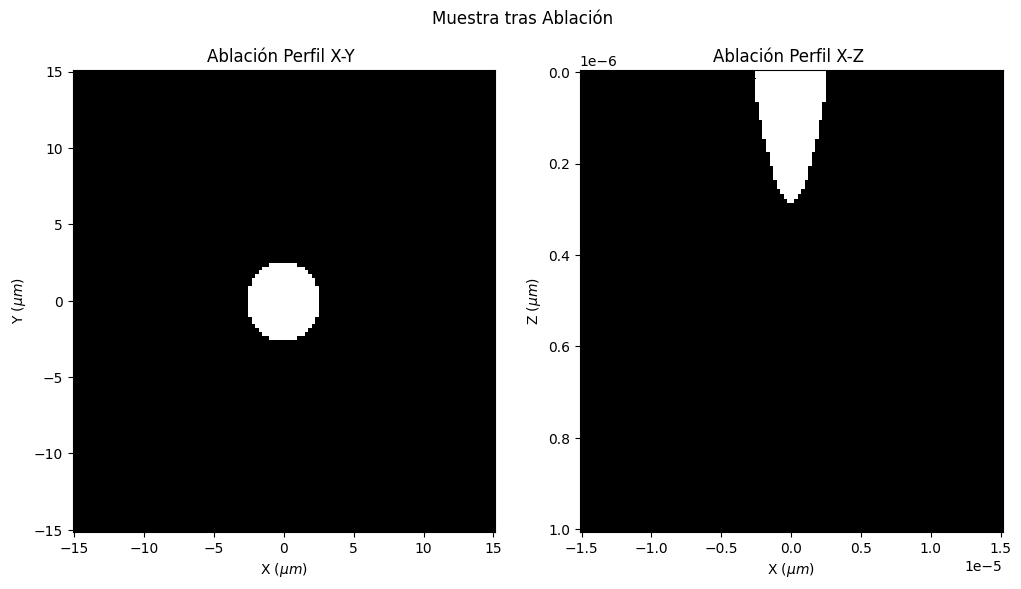

In [6]:
# -------- VISUALIZAR LOS AGUJEROS --------------------------

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
fig.suptitle('Muestra tras Ablación')
plt.gca().invert_yaxis()


im1 = ax1.pcolor(x*1e6,y*1e6,new_volume[:,:,0],vmin = 0, vmax = 1,cmap = "Greys")
ax1.set_title("Ablación Perfil X-Y ")
ax1.set_xlabel("X ($\mu m$)")
ax1.set_ylabel("Y ($\mu m$)")

aux_new_volume = np.transpose(new_volume,axes = [0,2,1])
im2 = ax2.pcolor(x,z,aux_new_volume[x_mid,:,:],vmin = 0, vmax = 1,cmap = "Greys")
ax2.set_title("Ablación Perfil X-Z ")
ax2.set_xlabel("X ($\mu m$)")
ax2.set_ylabel("Z ($\mu m$)");

# ---------------------------------------------------------------------------

In [7]:
Z_profile = new_volume[x_mid,y_mid,:]
X_profile = new_volume[:,y_mid,0]
Y_profile = new_volume[x_mid,:,0]

for i in range(len(Z_profile)-1):
    if Z_profile[i]-Z_profile[i+1] != 0:
        index_z = i
for i in range(len(X_profile)-1):
    if X_profile[i]-X_profile[i+1] != 0:
        index_x = i
        
Z_depth = z[index_z]
print(f"Profunidad de Ablación: {Z_depth*1e6:.2f} \u03BCm")

if F % 1 ==0:
    D = 2*np.abs(y[index_x])
else: 
    D = 2*np.abs(y[index_x] + (y[index_x+1]-y[index_x])/2)
print(f"Diámetro del Cráter: {D*1e6:.2f} \u03BCm")

df.loc[len(df.index)+1] = [F,Z_depth*1e6,Z_depth*1e9, D*1e6,(D*1e6)**2,]

df = df.sort_values("F")
df = df.reset_index(drop = True)
# df.head(10)

Profunidad de Ablación: 0.28 μm
Diámetro del Cráter: 5.04 μm


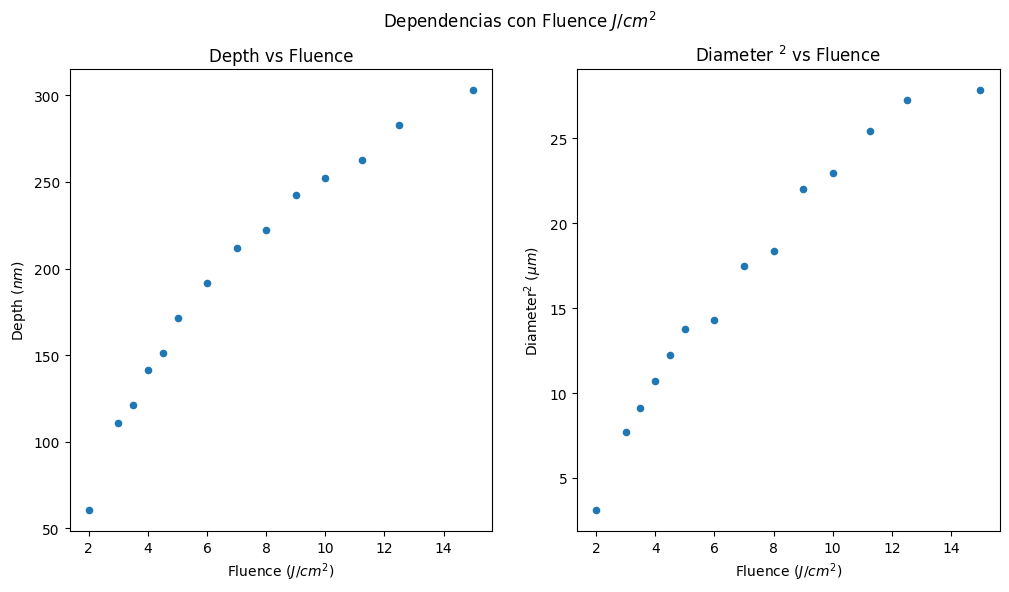

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,6))
fig.suptitle('Dependencias con Fluence $J/cm^2$')
df.plot.scatter("F","Lnm",title = "Depth vs Fluence",
                xlabel = "Fluence ($J/cm^2$)", ylabel = "Depth ($nm$)",ax = ax1);
df.plot.scatter("F","D2",title = "Diameter $^2$ vs Fluence",
                xlabel = "Fluence ($J/cm^2$)", ylabel = "Diameter$^2$ ($\mu m$)",ax = ax2);

In [58]:
df.to_excel("Dataframe.xlsx",index = False)

In [10]:
df.head(15)

,F,L,Lnm,D,D2
0,2.00,0.060606,60.606061,1.764706,3.114187
1,3.00,0.111111,111.111111,2.773109,7.690135
2,3.50,0.121212,121.212121,3.025210,9.151896
3,4.00,0.141414,141.414141,3.277311,10.740767
4,4.50,0.151515,151.515152,3.502300,12.266105
5,5.00,0.171717,171.717172,3.781513,14.299838
6,6.00,0.191919,191.919192,3.781513,14.299838
7,7.00,0.212121,212.121212,4.285714,18.367347
8,8.00,0.222222,222.222222,4.285714,18.367347
9,9.00,0.242424,242.424242,4.285714,18.367347
